   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.3 MB/s eta 0:00:00
--- SYSTEM INITIALIZED: RISK SIMULATION ENGINE ---
[1] INITIALIZING PARAMETERS...
[2] RUNNING 10000 WARGAME ITERATIONS...
[3] CALCULATING RISK METRICS...
------------------------------------------------------------
    >> EXPECTED PROFIT (Mean): $0.76M
    >> 95% CONFIDENCE RANGE:   $-0.25M to $1.79M
    >> PROBABILITY OF LOSS:    6.89%
------------------------------------------------------------

[4] GENERATING RISK TOPOGRAPHY...


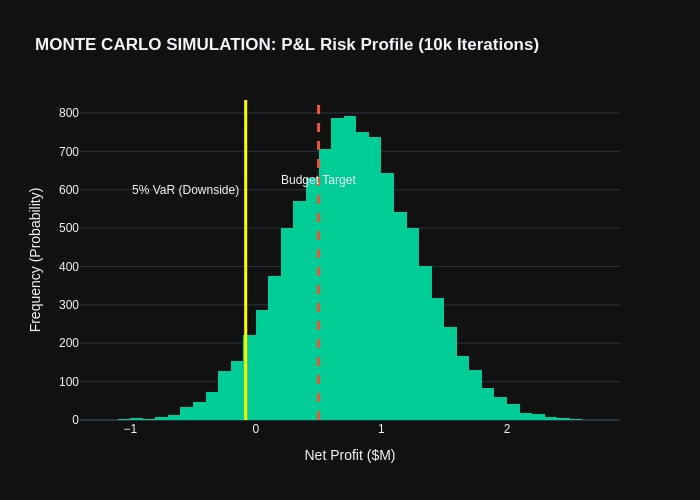

--- MISSION COMPLETE: RISK QUANTIFIED ---


In [1]:
# -----------------------------------------------------------------------------
# MODULE 3: MONTE CARLO RISK SIMULATOR (P&L WARGAMING)
# AUTHOR: Dr. Brian Penrod, DBA
# OBJECTIVE: Quantify P&L uncertainty using probabilistic simulation (10,000 iterations).
# STRATEGY: Move from "Point Estimates" (Single Number) to "Risk Distributions."
# -----------------------------------------------------------------------------

# FORCE INSTALL STABLE KALEIDO VERSION (0.2.1)
!pip install -q pandas numpy plotly scikit-learn statsmodels scipy "kaleido==0.2.1"

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import norm

# --- CONFIGURATION ---
SIMULATIONS = 10000
SEED = 42
np.random.seed(SEED)
TEMPLATE = "plotly_dark"

print("--- SYSTEM INITIALIZED: RISK SIMULATION ENGINE ---")

# =============================================================================
# PHASE 1: DEFINING THE "FOG OF WAR" (INPUT VARIABLES)
# =============================================================================
# Instead of guessing one number, we define a "Range of Uncertainty" for key drivers.
# Scenario: Annual SaaS P&L Projection

print("[1] INITIALIZING PARAMETERS...")

# 1. New ARR (Annual Recurring Revenue) - The Growth Engine
# We expect $5M, but it could be as low as $4M or as high as $7M (Standard Deviation = $0.5M)
sim_new_arr = np.random.normal(loc=5.0, scale=0.5, size=SIMULATIONS)

# 2. Churn Rate (The Leak)
# We target 5%, but it could spike to 8%. (Beta Distribution for percentages)
sim_churn = np.random.beta(a=2, b=40, size=SIMULATIONS) # Skewed distribution

# 3. Operating Expenses (OpEx)
# Highly predictable, but inflation/hiring can vary it. Uniform distribution between $3.8M and $4.2M.
sim_opex = np.random.uniform(low=3.8, high=4.2, size=SIMULATIONS)

# =============================================================================
# PHASE 2: EXECUTING THE SIMULATION (10,000 SCENARIOS)
# =============================================================================
print(f"[2] RUNNING {SIMULATIONS} WARGAME ITERATIONS...")

# Formula: Net Profit = (New ARR * (1 - Churn)) - OpEx
# (Simplified for demonstration)
sim_profit = (sim_new_arr * (1 - sim_churn)) - sim_opex

# Create DataFrame for analysis
df_sim = pd.DataFrame({
    'New_ARR': sim_new_arr,
    'Churn_Rate': sim_churn,
    'OpEx': sim_opex,
    'Net_Profit': sim_profit
})

# =============================================================================
# PHASE 3: QUANTIFYING RISK (VaR & CONFIDENCE INTERVALS)
# =============================================================================
print("[3] CALCULATING RISK METRICS...")

# 95% Confidence Interval
lower_bound = np.percentile(sim_profit, 2.5)
upper_bound = np.percentile(sim_profit, 97.5)
mean_profit = np.mean(sim_profit)

# Probability of Loss (Profit < 0)
prob_loss = np.mean(sim_profit < 0) * 100

print("-" * 60)
print(f"    >> EXPECTED PROFIT (Mean): ${mean_profit:.2f}M")
print(f"    >> 95% CONFIDENCE RANGE:   ${lower_bound:.2f}M to ${upper_bound:.2f}M")
print(f"    >> PROBABILITY OF LOSS:    {prob_loss:.2f}%")
print("-" * 60)

# =============================================================================
# PHASE 4: VISUALIZING THE BATTLEFIELD (HISTOGRAM)
# =============================================================================
print("\n[4] GENERATING RISK TOPOGRAPHY...")

fig = px.histogram(
    df_sim, x="Net_Profit", nbins=50,
    title="<b>MONTE CARLO SIMULATION: P&L Risk Profile (10k Iterations)</b>",
    template=TEMPLATE,
    color_discrete_sequence=["#00cc96"] # Neon Green
)

# Add Marker for "Budget Target" (Static Goal) vs "Reality"
budget_target = 0.5 # We promised the board $0.5M Profit
fig.add_vline(x=budget_target, line_width=3, line_dash="dash", line_color="#ef553b")
fig.add_annotation(x=budget_target, y=600, text="Budget Target", showarrow=False, yshift=10)

# Add VaR (Value at Risk) Line - 5% Worst Case
var_5_pct = np.percentile(sim_profit, 5)
fig.add_vline(x=var_5_pct, line_width=3, line_color="yellow")
fig.add_annotation(x=var_5_pct, y=600, text="5% VaR (Downside)", showarrow=False, xshift=-60)

fig.update_layout(
    xaxis_title="Net Profit ($M)",
    yaxis_title="Frequency (Probability)",
    showlegend=False
)

fig.show("png")
print("--- MISSION COMPLETE: RISK QUANTIFIED ---")